In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)

data=pd.read_csv('covid19.csv')
print(data.shape)
data.head()


(77, 4)


,date,day,no.,daily increase
0,4/1/2020,1,234,234
1,4/2/2020,2,309,75
2,4/3/2020,3,411,102
3,4/4/2020,4,485,74
4,4/5/2020,5,571,86


In [4]:
X=data['day'].values
Y=data['daily increase'].values

In [5]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)

numer=0
denom=0

for i in range (n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
    
b1= numer/denom
b0 = mean_y -(b1-mean_x)
print(b1,b0)


24.43974446606025 638.1836321573164


<function matplotlib.pyplot.show(*args, **kw)>

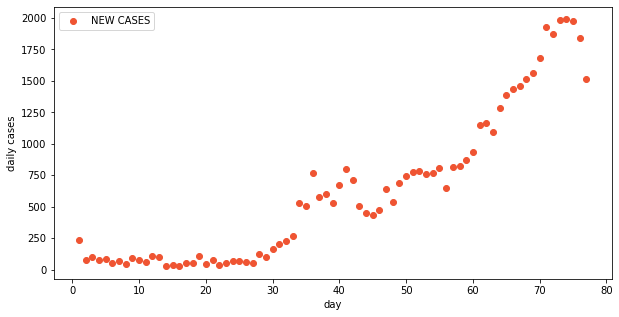

In [6]:
max_x =np.max(X)+100
min_x =np.min(X)-100

x= np.linspace(min_x, max_x, 1000)
y= b0+b1 * x

# plt.plot(x,y, color='#58b970', label='reggression line')
plt.scatter(X,Y, color='#ef5432', label='NEW CASES')

plt.xlabel('day')
plt.ylabel('daily cases')
plt.legend()
plt.show

In [7]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+= (Y[i]-mean_y)**2
    ss_r+= (Y[i]-y_pred)**2
r2 = 1-(ss_r/ss_t)
print(r2)

-1.823173612868295


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.92, random_state=0)
X_train= X_train.reshape(-1, 1)
Y_train= Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [10]:
lin_pred = lin_reg.predict(X_test)

In [11]:
case_pred = lin_reg.predict([[78]])

In [12]:
print(case_pred)

[[1754.46553824]]


In [13]:
case_pred = lin_reg.predict([[77]])

In [14]:
print(case_pred)

[[1725.40355577]]
